 # Opis notatnika
 Ten notatnik jest kontunacją analizy danych o lotach i ich opóźnieniach. Od tego momentu zaczniemy łączyć posiadana przez nas zbiory danych, będąc w stanie dokonać dodatkowych analiz.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednim kroku, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, text as sql_query
import plotly.express as px
import matplotlib.pyplot as plt
import os

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
dialect = 'postgresql'
username = 'postgres'
password = '123'
host = 'localhost'
database = 'airlines'
port = None
url = f'{dialect}://{username}:{password}@{host}/{database}'

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
engine = create_engine(url)
connection = engine.connect()

 Tutaj uzupełnij implementację metody `read_sql_table`

In [4]:
def read_sql_table(table_name):
    pass
    df = pd.read_sql_table(table_name,  con= connection)
    return df

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [115]:
os.chdir('../data/processed')
flight_04_02_df = pd.read_csv('flight_df_04_01.csv')
os.chdir('../../notebooks')

In [117]:
flight_04_02_df.drop_duplicates()

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,distance_group,year,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,5,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]"
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,5,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]"
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,5,2019,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]"
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,5,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]"
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,3,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026762,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,...,3,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]"
1026763,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,...,5,2019,5.0,0.0,19.0,0.0,0.0,True,False,"(1000, 1100]"
1026764,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,...,3,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]"
1026765,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,...,5,2019,0.0,0.0,66.0,0.0,0.0,True,False,"(1000, 1100]"


In [118]:
flight_04_02_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026767 entries, 0 to 1026766
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   month                1026767 non-null  int64  
 1   day_of_month         1026767 non-null  int64  
 2   day_of_week          1026767 non-null  int64  
 3   op_unique_carrier    1026767 non-null  object 
 4   tail_num             1026767 non-null  object 
 5   op_carrier_fl_num    1026767 non-null  int64  
 6   origin_airport_id    1026767 non-null  int64  
 7   dest_airport_id      1026767 non-null  int64  
 8   crs_dep_time         1026767 non-null  int64  
 9   dep_time             1026767 non-null  float64
 10  dep_delay            1026767 non-null  float64
 11  dep_time_blk         1026767 non-null  object 
 12  crs_arr_time         1026767 non-null  int64  
 13  arr_time             1026574 non-null  float64
 14  arr_delay_new        1024912 non-null  float64
 15

***mam o 30624 wierszy mniej niż w teście,  nie wiem dlaczego. zakładam że mam dobrze idę dalej***

Sprawdzenie poprawności danych w ramce `flight_df` 

In [119]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_04_02_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

AssertionError: Oczekiwano 1057391 wierszy, otrzymano 1026767

 # Wzbogacenie o `aircraft`
 Używając procedury `read_sql_table` wczytaj dane z tabeli `aircraft` i zapisz jako `aircraft_df`. Następnie:  
 1. Usuń z ramki kolumny `number_of_seats` oraz `id`. Na tej podstawie usuń nadmiarowe wiersze (duplikaty).  
 1. Następnie jeszcze raz sprawdź, czy dla kolumny `tail_num` nie występują duplikaty. Innymi słowy należy sprawdzić, czy dla jednego `tail_num` występuje więcej niż jeden rok produkcji.  
 1. Jeśli tak to:  
     - do ramki `aircraft_df_duplicated` zapisz powielone zgodnie ze sprawdzeniem wiersze,  
     - zgodnie z powyższym zmodyfikuj ramkę tak, aby w przypadku duplikatu za datę wytworzenia samolotu, uznana została najnowsza tj. jeśli dla `tail_num` są dostępne daty produkcji 1998 oraz 2001, uznajemy, że `tail_num` został wyprodukowany w `2001`.

 Wskazówki:
 - Praca z duplikatami na LMS: `Python - analiza danych -> Dzień 5 - Pandas -> Duplikaty`
 - Dokumentacja metody `duplicated`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
 - Dokumentacja metody `drop_duplicates`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [6]:
aircraft_df = pd.read_sql_table('aircraft', connection)
aircraft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacture_year  7383 non-null   int64  
 1   tail_num          7383 non-null   object 
 2   number_of_seats   7376 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 173.2+ KB


 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [7]:
aircraft_df.drop(columns = 'number_of_seats',inplace =True)
aircraft_df.drop_duplicates(inplace = True)
aircraft_df['manufacture_year'].isna().value_counts()

False    7364
Name: manufacture_year, dtype: int64

In [8]:
aircraft_df_grouped_df = aircraft_df.groupby('tail_num').count().sort_values(by = 'manufacture_year',\
                                                                             ascending = False).reset_index()
# aircraft_df_grouped_df[aircraft_df_grouped_df['manufacture_year'] == 2]
aircraft_df_grouped_df

,tail_num,manufacture_year
0,N783CA,2
1,N856GT,2
2,N877AS,2
3,B708RE,1
4,N785FD,1
...,...,...
7356,N418WN,1
7357,N418UP,1
7358,N418UA,1
7359,N418SW,1


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [9]:
aircraft_df_expected_rows = 7364
aircraft_df_expected_columns = set(['tail_num', 'manufacture_year'])

aircraft_df_rows = aircraft_df.shape[0]

diff = aircraft_df_expected_columns.symmetric_difference(set(aircraft_df.columns))
assert aircraft_df_rows == aircraft_df_expected_rows, f'Spodziewano się {aircraft_df_expected_rows} wierszy , otrzymano {aircraft_df_rows} wierszy'

assert diff == set([]), f'Spodziewano się {aircraft_df_expected_columns} kolumn, otrzymano: {aircraft_df_expected_columns} kolumn. Różnica: \n\t{diff}'

 Tutaj sprawdź czy w ramkce `aircraft_df` występują duplikaty wewnątrz kolumny `tail_num`. Czyli czy dla danego `tail_num` występuje więcej niż jeden rok produkcji.

In [36]:
aircraft_df_is_duplicated = aircraft_df[aircraft_df.duplicated('tail_num')]
aircraft_df_is_duplicated

,manufacture_year,tail_num
2086,2000,N783CA
5725,2014,N856GT
6746,2017,N877AS


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić czy ta część została poprawnie wykonana

In [37]:
aircraft_df_expected_rows = 3
aircraft_df_duplicated_rows = aircraft_df_is_duplicated.shape[0]
assert aircraft_df_duplicated_rows == aircraft_df_expected_rows, f"Oczekiwano {aircraft_df_expected_rows} wierszy, otrzymano {aircraft_df_duplicated_rows}"

 ## Modyfikacja `aircraft_df`
 Tutaj dokonaj aktualizacji tabeli `aircraft_df` - jeśli jest taka potrzeba. Zrób to tak aby, dla powielonych `tail_num`, `manufacture_year` został ustawiony jako najwyższy

In [38]:
aircraft_df_is_duplicated = aircraft_df[aircraft_df.duplicated('tail_num',  keep = False)].\
sort_values(['tail_num','manufacture_year'])
# lub
# aircraft_df_is_duplicated = aircraft_df.loc[aircraft_df['tail_num'].isin(['N856GT', 'N783CA','N877AS'])].sort_values('tail_num')
aircraft_df_is_duplicated

,manufacture_year,tail_num
1734,1999,N783CA
2086,2000,N783CA
4917,2011,N856GT
5725,2014,N856GT
2460,2001,N877AS
6746,2017,N877AS


In [44]:
# jeżeli usuwamy to :
# aircraft_df.drop(index = [ 1734, 2460, 5725],  inplace = True)
# lub jeżeli podmieniamy
aircraft_df.loc[1734,'manufacture_year'] = 2000
aircraft_df.loc[4917,'manufacture_year'] = 2014
aircraft_df.loc[2460,'manufacture_year'] = 2017


In [45]:
aircraft_df_is_duplicated = aircraft_df[aircraft_df.duplicated('tail_num',  keep = False)].\
sort_values(['tail_num','manufacture_year'])
aircraft_df_is_duplicated

,manufacture_year,tail_num
1734,2000,N783CA
2086,2000,N783CA
4917,2014,N856GT
5725,2014,N856GT
2460,2017,N877AS
6746,2017,N877AS


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [47]:
test_tail = 'N783CA'
test_value = aircraft_df.loc[aircraft_df['tail_num']
                             == test_tail]['manufacture_year']
test_value = int(test_value)

expected_value = 2000
assert test_value == expected_value, f"Dla 'tail_num' == '{test_tail}' oczekiwano {expected_value} otrzymano {test_value}"

TypeError: cannot convert the series to <class 'int'>

 ## Połączenie `aircraft_df` oraz `flight_df`
 Połącz ramkę `aircraft_df` oraz `flight_df` zgodnie z kluczem oraz odpowiedz na następujące pytania:
 1. Czy po połączeniu pojawiły się duplikaty? Dokonaj odpowiedniego sprawdzenia.
 1. Wyznacz zależność roku produkcji do częstotliwości opóźnień. Wynik zapisz do tabeli `delays_by_manufacture_year_df`.
 1. Przedstaw wyniki w tabeli za pomocą wykresu punktowego.
 1. Dokonaj modyfikacji w taki sposób, aby wyświetlone na wykresie zostały tylko takie roczniki samolotów, które wykonały łącznie więcej niż 10000 `(>)` lotów.

> **Wskazówka:**
> Aby nie utracić potencjalnie całej dotychczasowej pracy, zapisz wynik do tymczasowej zmiennej np. `tmp_flight_df`. Po sprawdzeniu możesz użyć metody `copy`: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), aby nadpisać `flight_df` używając `tmp_flight_df`.

 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

***sprawdzam shape pierwotnego flight***

In [120]:
tmp_flight_df = pd.merge(flight_04_02_df, aircraft_df,  on = 'tail_num', how = 'left')
tmp_flight_df

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,year,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2005.0
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2016.0
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,2019,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]",1998.0
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",1998.0
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]",2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026762,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",2017.0
1026763,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,...,2019,5.0,0.0,19.0,0.0,0.0,True,False,"(1000, 1100]",1992.0
1026764,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",1992.0
1026765,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,...,2019,0.0,0.0,66.0,0.0,0.0,True,False,"(1000, 1100]",2016.0


In [82]:
tmp_flight_df.head()

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,year,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2005.0
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2016.0
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,2019,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]",1998.0
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",1998.0
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]",2001.0


In [83]:
flight_04_02_df.shape[0] - tmp_flight_df.shape[0]

-17

***po mergu mamy 17 wierszy wiecej niż flight przed mergem, zakładam że w aircraft były tail_num, których nie było we flight***

decyduje sie na merge "left" żeby zachować wszystkie flight,  bo przy "inner" obcina 

 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [121]:
tmp_flight_df.drop_duplicates(inplace = True)
tmp_flight_df.duplicated().value_counts()

False    1026767
dtype: int64

***W ZMERGOWANEJ DF BRAK DUPLIKLATÓW***



******





In [122]:
tmp_flight_df['manufacture_year'].isna().value_counts()


False    1014922
True       11845
Name: manufacture_year, dtype: int64

***tutaj wychodza mi NaNy na manufacture_year choć w tabeli źródlowej aircraft nie ma tych NaNów,  domyślam się że sa flighty które mają tail_num którego nie ma w aircraft,  sprawdzam czy w pierwotnym aircraft_df były też NaNy***

In [86]:
aircraft_df['manufacture_year'].isna().value_counts()

False    7364
Name: manufacture_year, dtype: int64

***Nie było NaNów nie wiem o co chodzi,  przyjmuję że te ~12k pustych manufacture_year nie wpływa na analizę,  idę dalej***

 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [123]:
flight_04_02_df = tmp_flight_df
flight_04_02_df

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,year,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2005.0
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2016.0
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,2019,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]",1998.0
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",1998.0
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]",2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026762,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",2017.0
1026763,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,...,2019,5.0,0.0,19.0,0.0,0.0,True,False,"(1000, 1100]",1992.0
1026764,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,...,2019,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",1992.0
1026765,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,...,2019,0.0,0.0,66.0,0.0,0.0,True,False,"(1000, 1100]",2016.0


 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [10]:
delays_by_manufacture_year_df = flight_04_02_df.groupby('manufacture_year').agg({'is_delayed':'count'}).reset_index()
pd.to_datetime(delays_by_manufacture_year_df['manufacture_year'])

NameError: name 'flight_04_02_df' is not defined

 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

<Axes: xlabel='manufacture_year'>

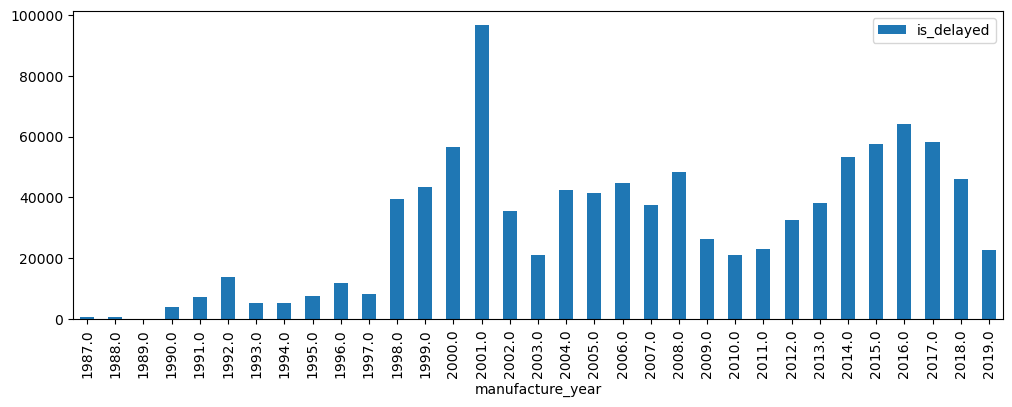

In [125]:
delays_by_manufacture_year_df.plot.bar(
x = 'manufacture_year',
y = 'is_delayed',
figsize=(12, 4))

 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

<Axes: xlabel='manufacture_year'>

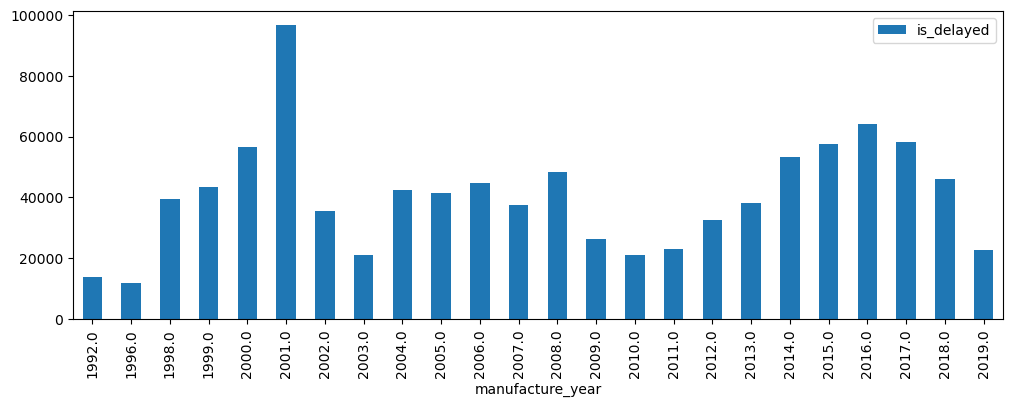

In [126]:
delays_by_manufacture_year_df_10000 = delays_by_manufacture_year_df[delays_by_manufacture_year_df['is_delayed'] >10000 ]
delays_by_manufacture_year_df_10000.plot.bar(
x = 'manufacture_year',
y = 'is_delayed',
figsize=(12, 4))
# delays_by_manufacture_year_df_10000

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [127]:
manufacture_year_list = []
for year in range (int(tmp_flight_df['manufacture_year'].min()-3),int(tmp_flight_df['manufacture_year'].max()+3),3):
    manufacture_year_list.append(year)
manufacture_year_list


[1984, 1987, 1990, 1993, 1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020]

***wychodza mi roczniki produkcji NaN a w df wyjściowej aircraft ich nie było,  może to oznaczać że we flight sa tail_num, których nie ma w aircraft)***

In [131]:
tmp_flight_df.head()

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2005.0,"(2002, 2005]"
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2016.0,"(2014, 2017]"
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]",1998.0,"(1996, 1999]"
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",1998.0,"(1996, 1999]"
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]",2001.0,"(1999, 2002]"


In [137]:
tmp_flight_df['manufacture_year_agg'] = pd.cut(x = tmp_flight_df['manufacture_year'], bins = manufacture_year_list)
flight_04_02_df = tmp_flight_df
tmp_flight_df

,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,1,20,7,WN,N204WN,682,10397,11292,605,602.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2005.0,"(2002, 2005]"
1,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",2016.0,"(2014, 2017]"
2,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,...,4.0,0.0,10.0,0.0,3.0,True,True,"(1100, 1200]",1998.0,"(1996, 1999]"
3,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(1100, 1200]",1998.0,"(1996, 1999]"
4,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,...,NaN,NaN,NaN,NaN,NaN,False,True,"(500, 600]",2001.0,"(1999, 2002]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026762,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,...,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",2017.0,"(2014, 2017]"
1026763,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,...,5.0,0.0,19.0,0.0,0.0,True,False,"(1000, 1100]",1992.0,"(1990, 1993]"
1026764,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,...,NaN,NaN,NaN,NaN,NaN,False,False,"(500, 600]",1992.0,"(1990, 1993]"
1026765,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,...,0.0,0.0,66.0,0.0,0.0,True,False,"(1000, 1100]",2016.0,"(2014, 2017]"


 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [135]:
flight_delays_by_manufacture_year_agg_df = tmp_flight_df.groupby('manufacture_year_agg').agg({'is_delayed':'count'}).reset_index()
flight_delays_by_manufacture_year_agg_df

,manufacture_year_agg,is_delayed
0,"(1984, 1987]",443
1,"(1987, 1990]",4662
2,"(1990, 1993]",26278
3,"(1993, 1996]",24650
4,"(1996, 1999]",91208
5,"(1999, 2002]",188930
6,"(2002, 2005]",104633
7,"(2005, 2008]",130843
8,"(2008, 2011]",70111
9,"(2011, 2014]",124250


 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

<Axes: xlabel='manufacture_year_agg'>

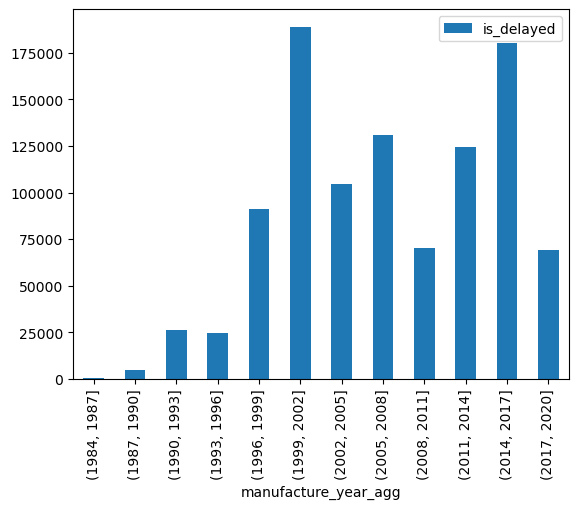

In [136]:
flight_delays_by_manufacture_year_agg_df.plot.bar(
x = 'manufacture_year_agg', 
y = 'is_delayed')

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [133]:
top_manufactured_df = tmp_flight_df.groupby('manufacture_year').agg({'op_carrier_fl_num':'count','is_delayed':'sum'}).\
reset_index().sort_values('op_carrier_fl_num', ascending = False).head(5)
top_manufactured_df

,manufacture_year,op_carrier_fl_num,is_delayed
14,2001.0,96632,15813
29,2016.0,64188,12892
30,2017.0,58325,11570
28,2015.0,57488,11775
13,2000.0,56739,10841


 # Podsumowanie
 W tym notatniku do naszej wyjściowej ramki danych `flight_df` dołączyliśmy tabelę `aircraft_df` i za jej pomocą dodaliśmy kolejny wymiar do naszej analizy. Zauważmy, ile dodatkowych wniosków mogliśmy wyciągnąć dzięki jej dodaniu.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę z nazwą nawiązującą do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób

In [144]:
os.chdir('../data/processed')
flight_04_02_df.to_csv('flight_df_04_02.csv',  index = False)
os.chdir('../../notebooks')